# Business Case: Walmart - Confidence Interval and CLT 

## Business Problem : 

###### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically,  purchase amount) against the customer’s gender and the various other factors to help the business make  better decisions. They want to understand if the spending habits differ between male and female  customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male  and 50 million are female).

##### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as spy

##### Loading the dataset

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

##### shape of data

In [3]:
df.shape

(550068, 10)

##### columns present in the data

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

##### datatype of the each column 

In [5]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


##### Is there any missing value in the dataset? 

In [8]:
np.any(df.isna())

False

##### Is there any duplicate value in the dataset ?

In [9]:
np.any(df.duplicated())

False

##### Basic information about the dataset  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## Memory Optimization

##### Converting User_ID column datatype to int32

In [11]:
df['User_ID'] = df['User_ID'].astype('int32')

##### Updating 'Marital_Status' column 

In [12]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [13]:
df['Marital_Status'] = df['Marital_Status'].astype('category')

##### Converting 'Age' column datatype to category

In [14]:
df['Age'] = df['Age'].astype('category')

##### Converting 'Product_Category' column datatype to int8

In [15]:
df['Product_Category'] = df['Product_Category'].astype('int8')

##### Converting 'Occupation' column's datatype to int8

In [16]:
df['Occupation'] = df['Occupation'].astype('int8')

##### Converting 'City_Category' column's datatype to category

In [17]:
df['City_Category'] = df['City_Category'].astype('category')

##### Converting 'Stay_In_Current_City_Years' column's datatype to category

In [18]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


##### Earlier the dataframe took 42.0+ MB of memory but the memory usage is reduced to 17.8+ MB (57.62% reduction in the memory usage).

##### Basic statistical description of the dataset 

In [20]:
# For measurable quantities
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


In [21]:
# description of columns with 'object' datatype
df.describe(include = 'object')

,Product_ID,Gender
count,550068,550068
unique,3631,2
top,P00265242,M
freq,1880,414259


### value_counts and unique attributes

In [22]:
# Total number of transactions made by each gender
np.round(df['Gender'].value_counts(normalize = True) * 100, 2)

M    75.31
F    24.69
Name: Gender, dtype: float64

In [23]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2).cumsum()

4     13.15
0     25.81
7     36.56
1     45.18
17    52.46
20    58.56
12    64.23
14    69.19
2     74.02
16    78.63
6     82.33
3     85.54
10    87.89
5     90.10
15    92.31
11    94.42
19    95.96
13    97.36
18    98.56
9     99.70
8     99.98
Name: Occupation, dtype: float64

In [24]:
np.round(df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

In [25]:
np.round(df['Product_Category'].value_counts(normalize = True).head(10) * 100, 2).cumsum()

5     27.44
1     52.96
8     73.67
11    78.09
2     82.43
6     86.15
3     89.82
4     91.96
16    93.75
15    94.89
Name: Product_Category, dtype: float64

##### How many unique customers are there for each gender

In [26]:
df_gender_dist = pd.DataFrame(df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_gender_dist['percent_share'] = np.round(df_gender_dist['unique_customers'] / df_gender_dist['unique_customers'].sum() * 100, 2)
df_gender_dist

,Gender,unique_customers,percent_share
0,F,1666,28.28
1,M,4225,71.72


##### How many transactions are made by each gender category ?

In [27]:
df.groupby(by = ['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [28]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


##### What is the total Revenue generated by Walmart from each Gender ?

In [29]:
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


##### What is the average total purchase made by each user  in each gender ?

In [30]:
df1 = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Gender')['Average_Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Average_Purchase, dtype: float64

##### What is the Average Revenue generated by Walmart from each Gender per transaction ? 

In [31]:
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


##### How many unique customers are there for each Marital Status ? 

In [32]:
df_marital_status_dist = pd.DataFrame(df.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_marital_status_dist['percent_share'] = np.round(df_marital_status_dist['unique_customers'] / df_marital_status_dist['unique_customers'].sum() * 100, 2)
df_marital_status_dist

,Marital_Status,unique_customers,percent_share
0,Married,2474,42.0
1,Single,3417,58.0


##### How many transactions are made by each Marital Status category ?

In [33]:
df.groupby(by = ['Marital_Status'])['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

In [34]:
print('Average number of transactions made by each user with marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with marital status Married is 91
Average number of transactions made by each with marital status Single is 95


##### What is the total Revenue generated by Walmart from each Marital Status ?

In [35]:
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['Purchase'] / df_marital_status_revenue['Purchase'].sum()) * 100, 2)
df_marital_status_revenue

,Marital_Status,Purchase,percent_share
0,Single,3008927447,59.05
1,Married,2086885295,40.95


##### What is the average total purchase made by each user  in each marital status ?

In [36]:
df1 = pd.DataFrame(df.groupby(by = ['Marital_Status', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Marital_Status')['Average_Purchase'].mean()

Marital_Status
Married    354249.753013
Single     510766.838737
Name: Average_Purchase, dtype: float64

In [37]:
df_age_dist = pd.DataFrame(df.groupby(by = ['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
df_age_dist['percent_share'] =  np.round(df_age_dist['unique_customers'] / df_age_dist['unique_customers'].sum() * 100, 2)
df_age_dist['cumulative_percent'] =  df_age_dist['percent_share'].cumsum()
df_age_dist

,Age,unique_customers,percent_share,cumulative_percent
2,26-35,2053,34.85,34.85
3,36-45,1167,19.81,54.66
1,18-25,1069,18.15,72.81
4,46-50,531,9.01,81.82
5,51-55,481,8.16,89.98
6,55+,372,6.31,96.29
0,0-17,218,3.70,99.99


[]

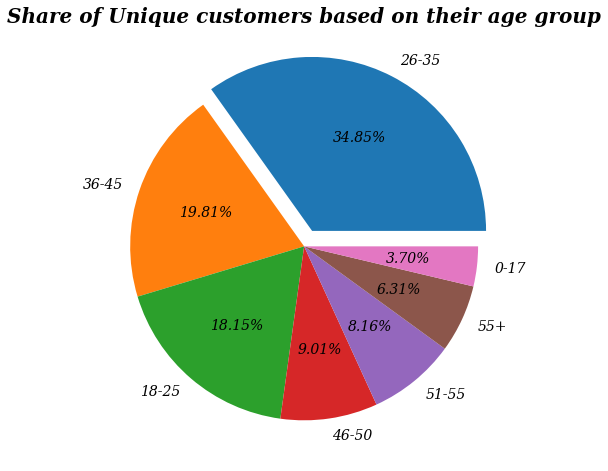

In [38]:
plt.figure(figsize = (8, 8))
plt.title('Share of Unique customers based on their age group', fontdict = {'fontsize' : 20,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 600} )
plt.pie(x = df_age_dist['percent_share'], labels = df_age_dist['Age'], 
        explode = [0.1] + [0] * 6, autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

In [39]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [40]:
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
df_age_revenue['percent_share'] = np.round((df_age_revenue['Purchase'] / df_age_revenue['Purchase'].sum()) * 100, 2)
df_age_revenue['cumulative_percent_share'] = df_age_revenue['percent_share'].cumsum()
df_age_revenue

,Age,Purchase,percent_share,cumulative_percent_share
2,26-35,2031770578,39.87,39.87
3,36-45,1026569884,20.15,60.02
1,18-25,913848675,17.93,77.95
4,46-50,420843403,8.26,86.21
5,51-55,367099644,7.20,93.41
6,55+,200767375,3.94,97.35
0,0-17,134913183,2.65,100.00


[]

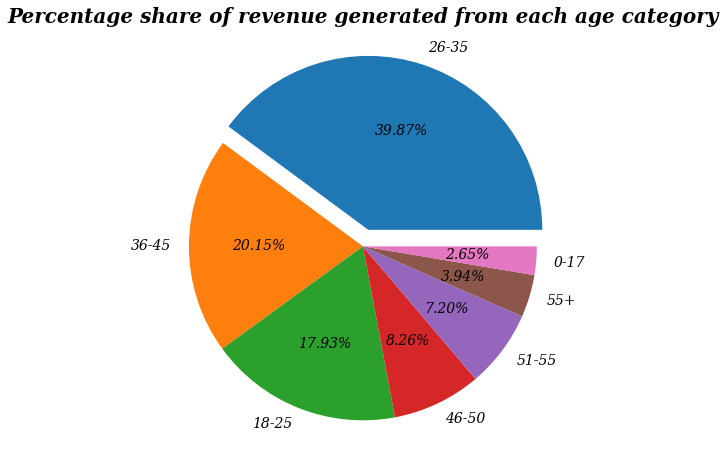

In [41]:
plt.figure(figsize = (8, 8))
plt.title('Percentage share of revenue generated from each age category', fontdict = {'fontsize' : 20,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 600} )
plt.pie(x = df_age_revenue['percent_share'], labels = df_age_revenue['Age'], 
        explode = [0.1] + [0] * 6, autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

In [42]:
df_city_dist = pd.DataFrame(df.groupby(by = ['City_Category'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_city_dist['percent_share'] = np.round((df_city_dist['unique_customers'] / df_city_dist['unique_customers'].sum()) * 100, 2)
df_city_dist['cumulative_percent_share'] = df_city_dist['percent_share'].cumsum()
df_city_dist

,City_Category,unique_customers,percent_share,cumulative_percent_share
0,A,1045,17.74,17.74
1,B,1707,28.98,46.72
2,C,3139,53.28,100.00


In [43]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

##### What is the revenue generated from different cities ?

In [44]:
df_city_revenue = df.groupby(by = ['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_city_revenue['percent_share'] = np.round((df_city_revenue['Purchase'] / df_city_revenue['Purchase'].sum()) * 100, 2)
df_city_revenue['cumulative_percent_share'] = df_city_revenue['percent_share'].cumsum()
df_city_revenue

,City_Category,Purchase,percent_share,cumulative_percent_share
0,B,2115533605,41.52,41.52
1,C,1663807476,32.65,74.17
2,A,1316471661,25.83,100.00


In [45]:
df.groupby(by = ['Product_Category'])['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

##### What is the revenue generated from different product categories ?

In [46]:
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue['percent_share'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
df_product_revenue['cumulative_percent_share'] = df_product_revenue['percent_share'].cumsum()
df_product_revenue

,Product_Category,Purchase,percent_share,cumulative_percent_share
0,1,1910013754,37.48,37.48
1,5,941835229,18.48,55.96
2,8,854318799,16.77,72.73
3,6,324150302,6.36,79.09
4,2,268516186,5.27,84.36
5,3,204084713,4.00,88.36
6,16,145120612,2.85,91.21
7,11,113791115,2.23,93.44
8,10,100837301,1.98,95.42
9,15,92969042,1.82,97.24


In [47]:
top5 = df_product_revenue.head(5)['Purchase'].sum() /  df_product_revenue['Purchase'].sum()
top5 = np.round(top5 * 100, 2)
print(f'Top 5 product categories from which Walmart makes {top5} % of total revenue are : {list(df_product_revenue["Product_Category"].head())}')

Top 5 product categories from which Walmart makes 84.36 % of total revenue are : [1, 5, 8, 6, 2]


[]

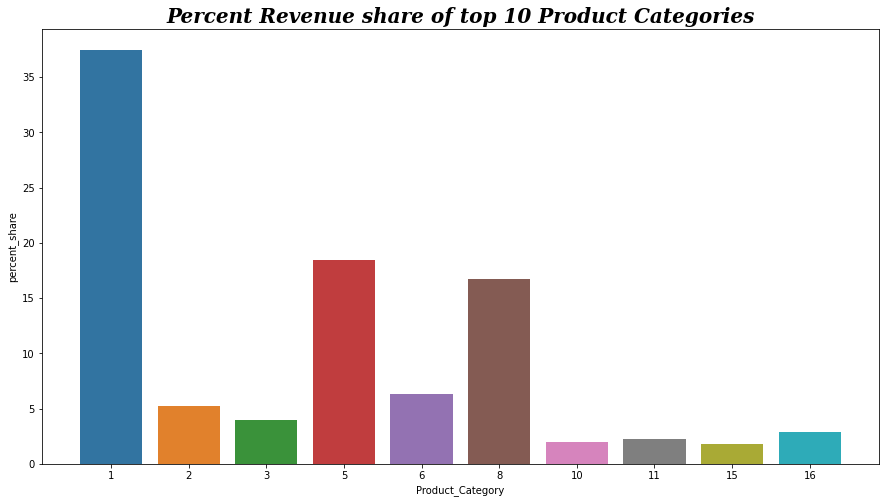

In [48]:
plt.figure(figsize = (15, 8))
plt.title('Percent Revenue share of top 10 Product Categories', fontsize = 20, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
sns.barplot(data = df_product_revenue, x = df_product_revenue.head(10)['Product_Category'], y = df_product_revenue.head(10)['percent_share'])
plt.plot()

##### What is the total Revenue generated by Walmart from each Gender ?

In [49]:
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


##### What is the Average Revenue generated by Walmart from each Gender per transaction ? 

In [50]:
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


#### Distribution of number of Transactions :

[]

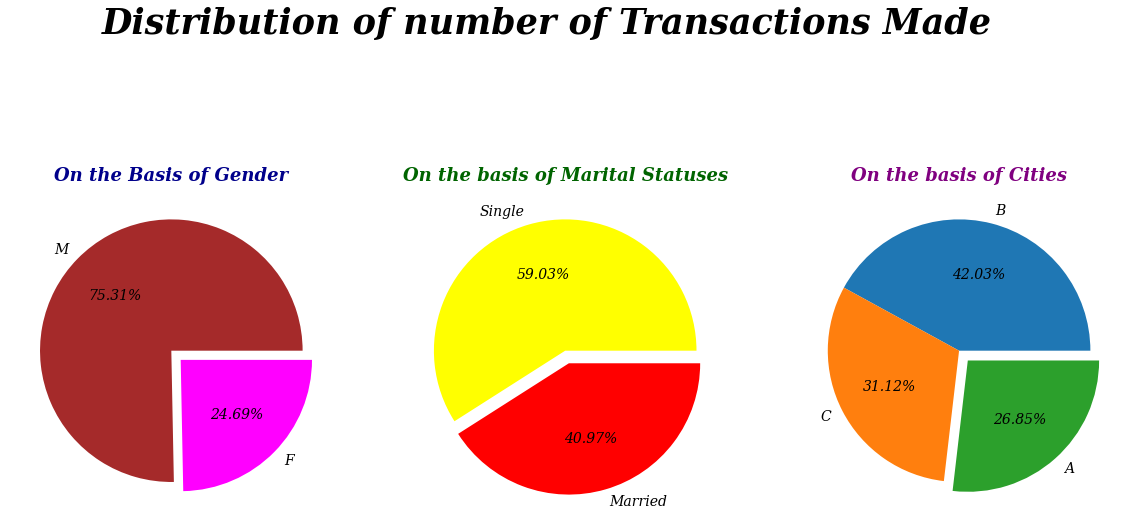

In [51]:
plt.figure(figsize = (20, 10))
plt.suptitle('Distribution of number of Transactions Made', fontsize = 35, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.subplot(1, 3, 1)
plt.title('On the Basis of Gender', color = 'darkblue', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_gender_dist = np.round(df['Gender'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_gender_dist.values, labels = df_gender_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['brown', 'magenta'])
plt.plot()
plt.subplot(1, 3, 2)
plt.title('On the basis of Marital Statuses', color = 'darkgreen', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_Marital_Status_dist = np.round(df['Marital_Status'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_Marital_Status_dist.values, labels = df_Marital_Status_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['yellow', 'red'])
plt.plot()
plt.subplot(1, 3, 3)
plt.title("On the basis of Cities", color = 'purple', fontdict = {'fontsize' : 18,
                                                'fontweight' : 555,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_City_Category_dist = np.round(df['City_Category'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_City_Category_dist.values, labels = df_City_Category_dist.index, 
        explode = [0, 0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

### Univariate Analysis 

[]

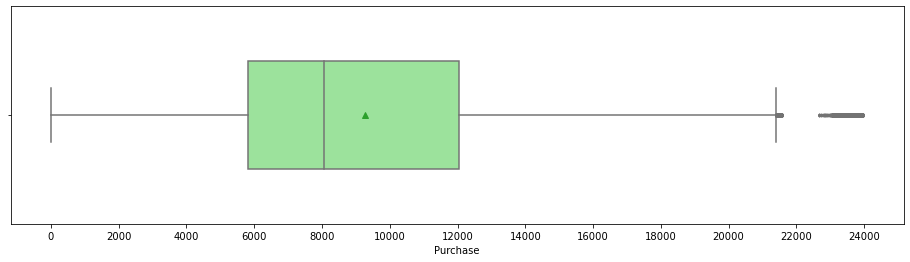

In [52]:
plt.figure(figsize = (16, 4))
sns.boxplot(data = df, 
            x = 'Purchase', 
            showmeans = True, 
            fliersize = 2, 
            width = 0.5, 
            color = np.random.choice(['magenta', 'lightgreen', 'cyan']))
plt.xticks(np.arange(0, 25001, 2000))
plt.plot()

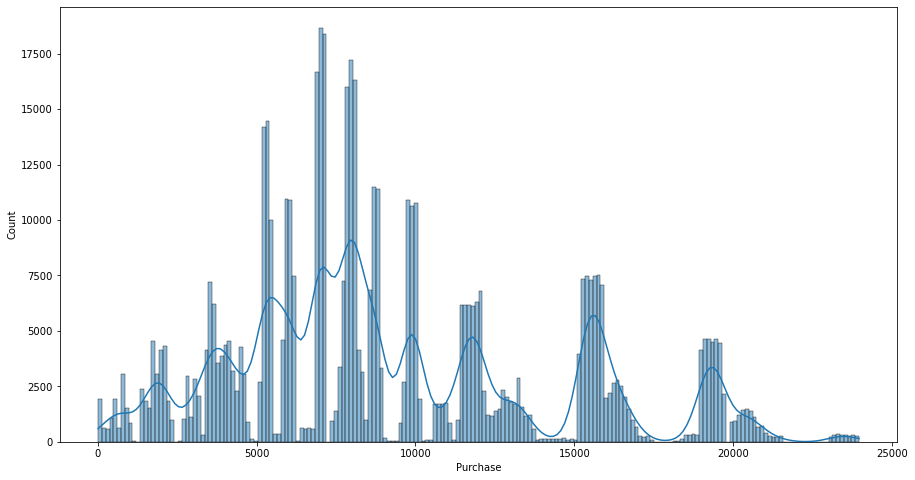

In [53]:
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'Purchase', kde = True, bins = 200)
plt.show()

[]

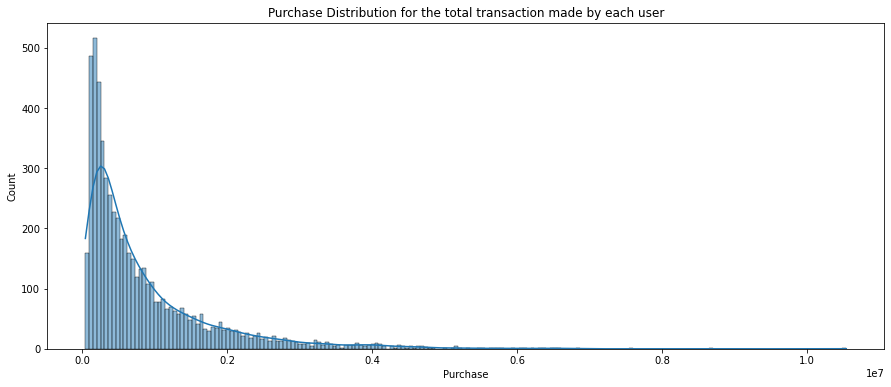

In [54]:
plt.figure(figsize = (15, 6))
plt.title('Purchase Distribution for the total transaction made by each user')
df_customer = df.groupby(by = 'User_ID')['Purchase'].sum()
sns.histplot(data = df_customer, kde = True, bins = 200)
plt.plot()

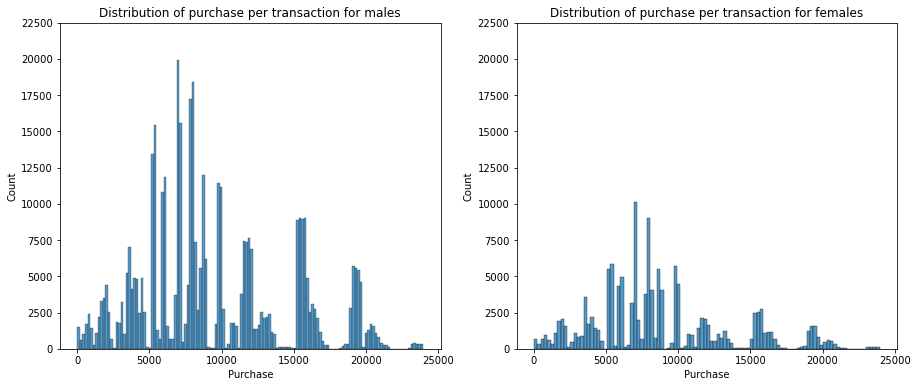

In [55]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()

In [56]:
df_cust_gender = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_cust_gender

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [57]:
df_male_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']

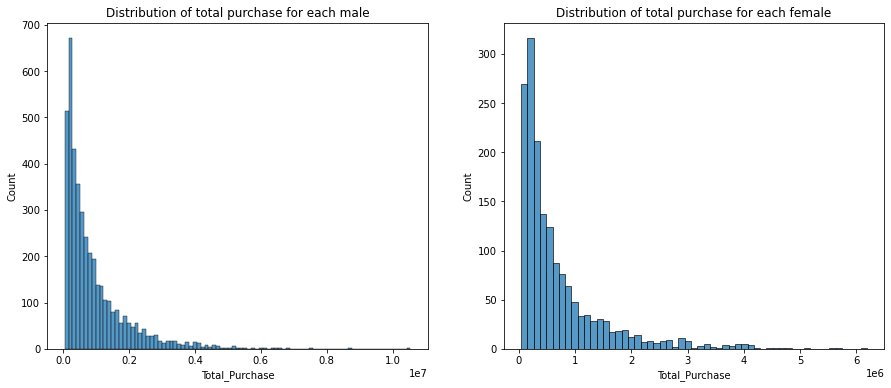

In [58]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.histplot(data = df_male_customer, x = 'Total_Purchase')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female_customer, x = 'Total_Purchase')
plt.show()

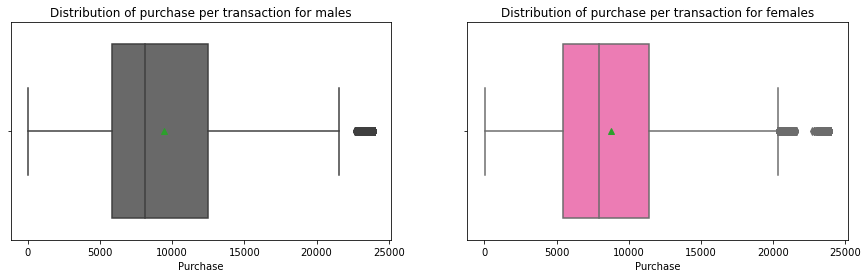

In [59]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = df_male, x = 'Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = df_female, x = 'Purchase', showmeans = True, color = 'hotpink')
plt.show()

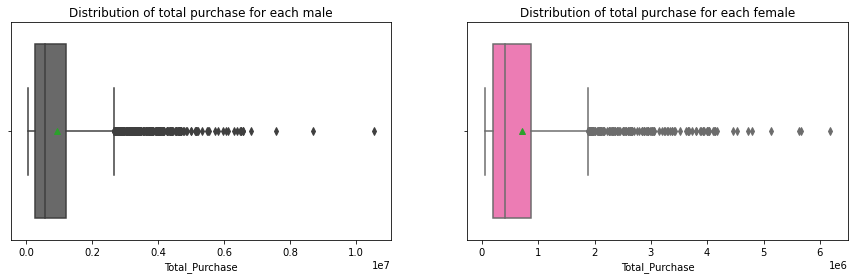

In [60]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = df_male_customer, x = 'Total_Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = df_female_customer, x = 'Total_Purchase', showmeans = True, color = 'hotpink')
plt.show()

In [61]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

[]

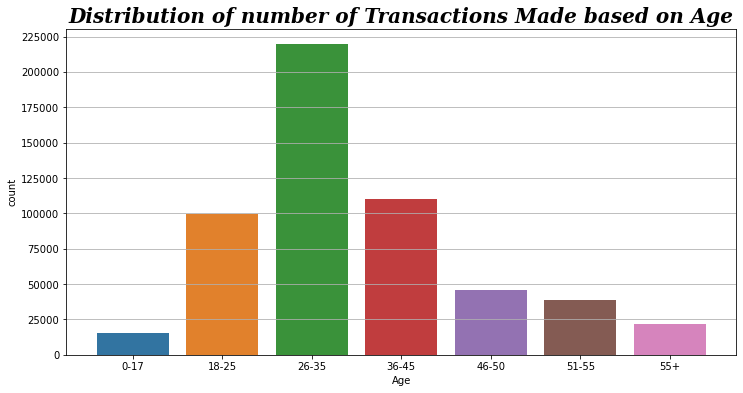

In [62]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of number of Transactions Made based on Age', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
plt.yticks(np.arange(0, 250001, 25000))
plt.grid('y')
sns.countplot(data = df, x = 'Age', 
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.plot()

[]

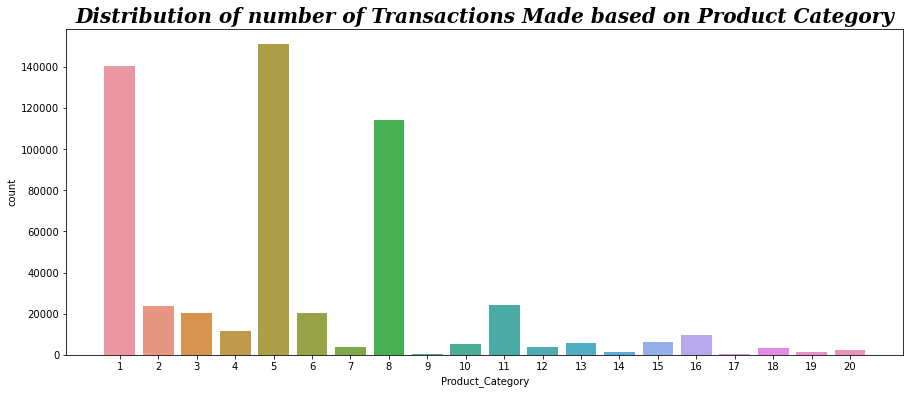

In [63]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Product Category', fontsize = 20, fontweight = 600, fontstyle = 'oblique', fontfamily = 'serif')
sns.countplot(data = df, x = 'Product_Category')
plt.plot()

[]

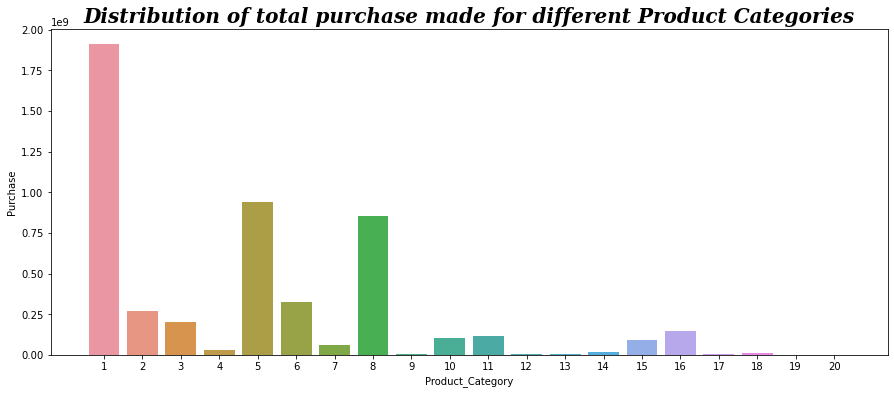

In [64]:
df_product_category = df.groupby(by = 'Product_Category')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made for different Product Categories', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.barplot(data = df_product_category, x = 'Product_Category', y = 'Purchase')
plt.plot()

[]

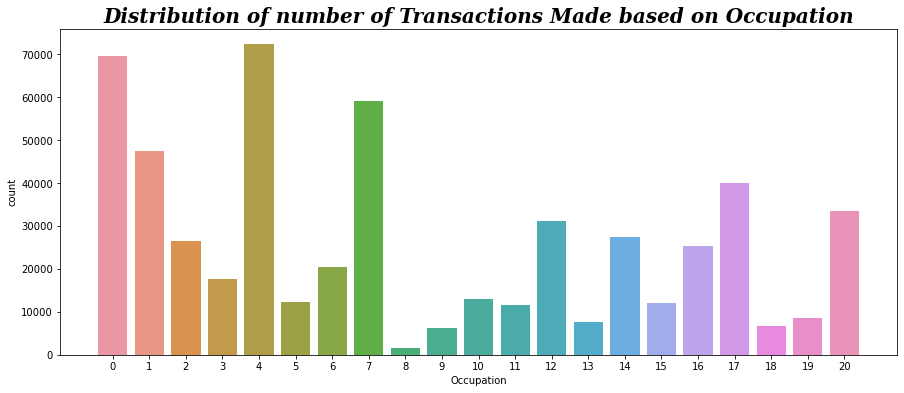

In [65]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Occupation', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.countplot(data = df, x = 'Occupation')
plt.plot()

[]

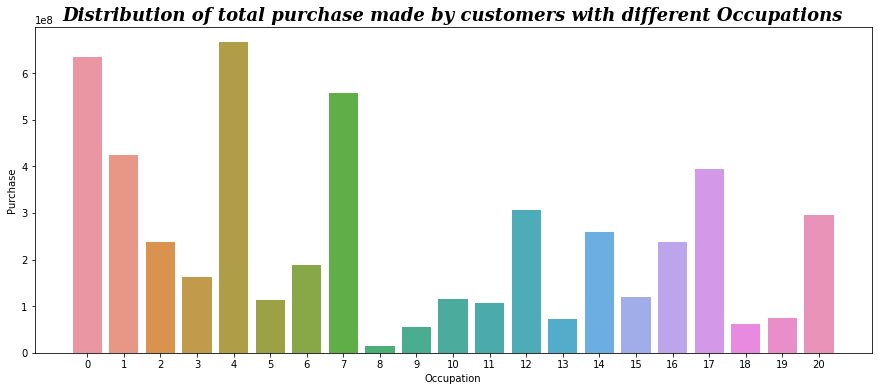

In [66]:
df_occupation = df.groupby(by = 'Occupation')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made by customers with different Occupations', 
          fontsize = 18, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.barplot(data = df_occupation, x = 'Occupation', y = 'Purchase')
plt.plot()

## Bivariate Analysis 

[]

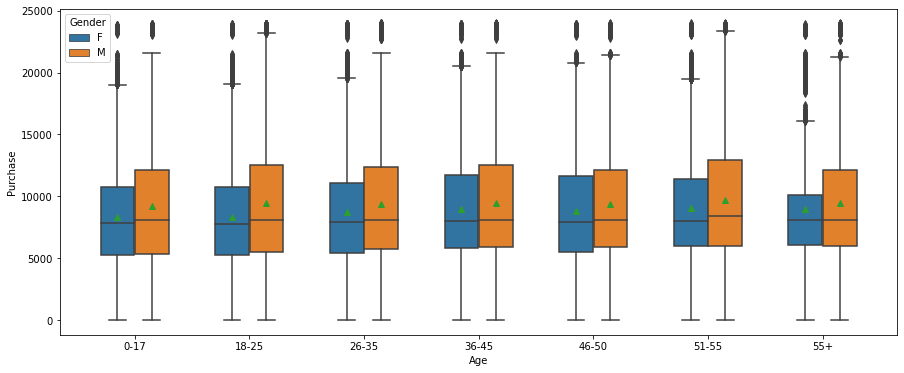

In [67]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.plot()

[]

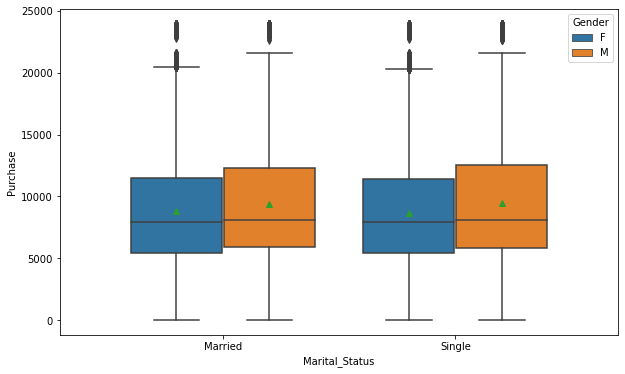

In [68]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True, width  = 0.8)
plt.plot()

[]

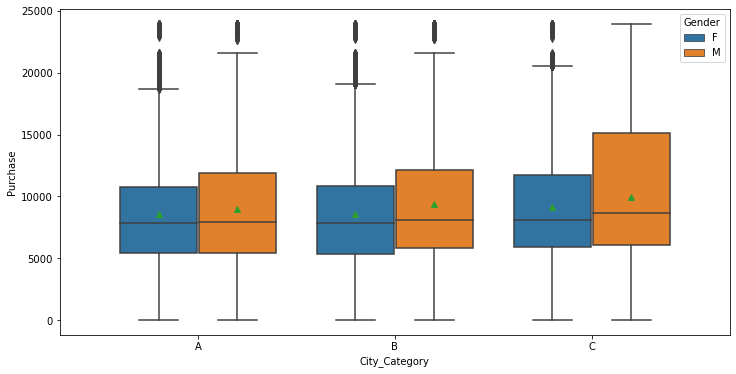

In [69]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

[]

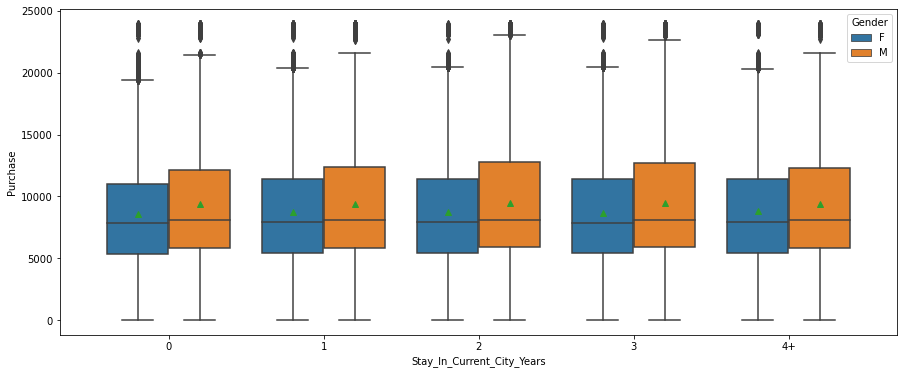

In [70]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

## Determining the mean purchase made by each user 

### For Males 

##### How the deviations vary for different sample sizes ? 

In [71]:
df_male_customer

,Gender,User_ID,Total_Purchase
1666,M,1000002,810472
1667,M,1000003,341635
1668,M,1000004,206468
1669,M,1000005,821001
1670,M,1000007,234668
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [72]:
mean_purchases = []
for sample_size in range(50, 4000):
    sample_mean = df_male_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

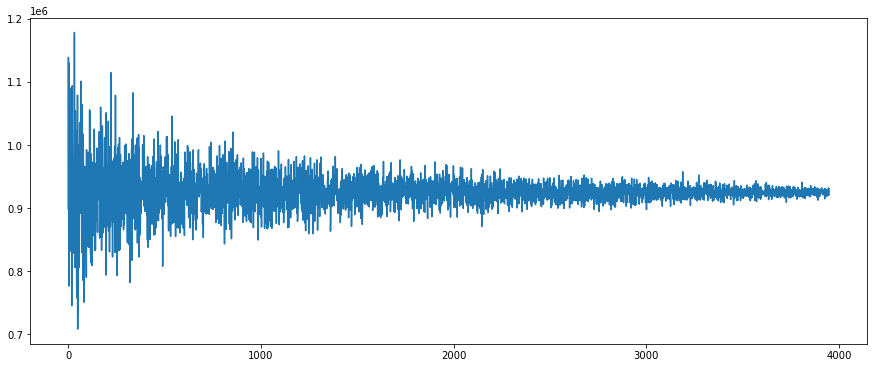

In [73]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.xticks(np.arange(0, 10001, 1000))
plt.plot()

##### For conservative analysis, sample size of 4000 is taken 1000 times

In [74]:
means = []
for sample_size in range(1000):
    sample_mean = df_male_customer['Total_Purchase'].sample(4000).mean()
    means.append(sample_mean)


[]

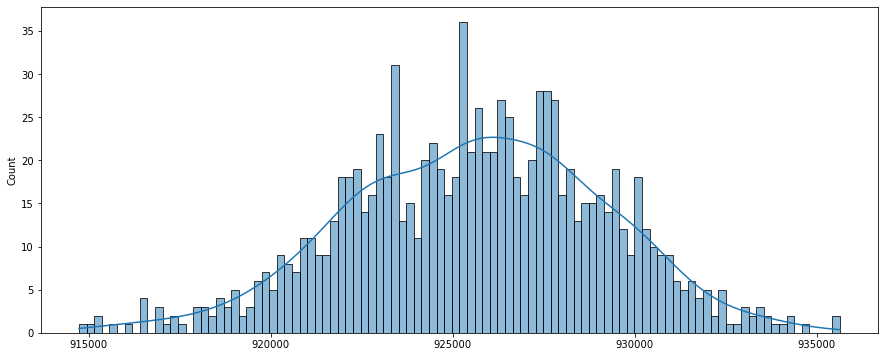

In [75]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()


##### Determining Mean Purchase made by males  with 90% Confidence

In [76]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(925623.93278775, 3517.0236273838314)

In [77]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(919838.9437181737, 931408.9218573264)

##### Determining Mean Purchase made by males  with 95% Confidence

In [78]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(918730.6931453013, 932517.1724301988)

##### Determining Mean Purchase made by males with 99% Confidence

In [79]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(916564.6802670609, 934683.1853084392)

### For Females 

##### How the deviations vary for different sample sizes ? 

In [80]:
df_female_customer

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


In [81]:
mean_purchases = []
for sample_size in range(50, 1600):
    sample_mean = df_female_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

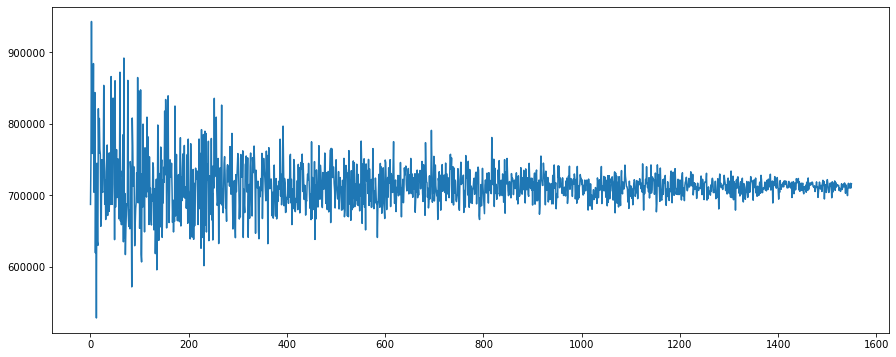

In [82]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 1500 is taken 1000 times

In [83]:
means = []
for sample_size in range(1000):
    sample_mean = df_female_customer['Total_Purchase'].sample(1500).mean()
    means.append(sample_mean)

[]

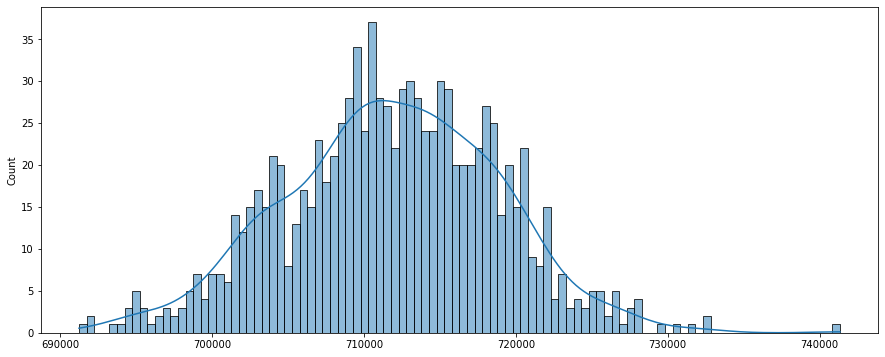

In [84]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()


##### Determining Mean Purchase made by females  with 90% Confidence

In [85]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(711805.7182106667, 7016.102623871412)

In [86]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(700265.2563627281, 723346.1800586053)

##### Determining Mean Purchase made by females  with 95% Confidence

In [87]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(698054.4097560417, 725557.0266652916)

##### Determining Mean Purchase made by females with 99% Confidence

In [88]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(693733.4354753924, 729878.000945941)

## Determining the mean purchase made by each user belonging to different Marital Status per transaction

In [89]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']

In [90]:
df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

### For Singles

In [91]:
df_single

,User_ID,Total_Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000006,379930
4,1000009,594099
...,...,...
3412,1006034,197086
3413,1006035,956645
3414,1006037,1119538
3415,1006038,90034


##### How the deviations vary for different sample sizes ? 

In [92]:
mean_purchases = []
for sample_size in range(50, 3000):
    sample_mean = df_single['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

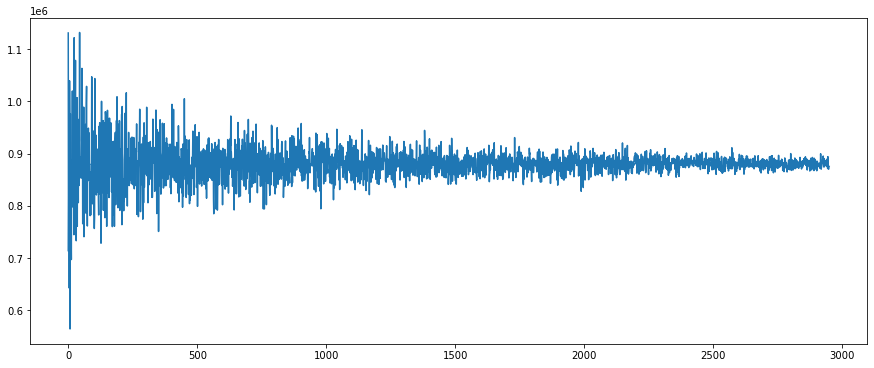

In [93]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 3000 is taken 1000 times

In [94]:
means = []
for sample_size in range(1000):
    sample_mean = df_single['Total_Purchase'].sample(3000).mean()
    means.append(sample_mean)

[]

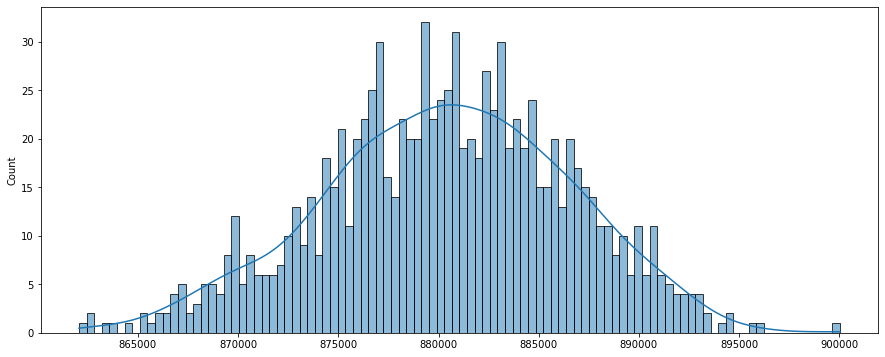

In [95]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by singles with 90% Confidence

In [96]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(880355.651924, 6128.54761925659)

In [97]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(870275.088144521, 890436.215703479)

#### Determining Mean Total Purchase made by singles with 95% Confidence

In [98]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(868343.9193127184, 892367.3845352816)

##### Determining Mean Total Purchase made by singles with 99% Confidence

In [99]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(864569.5593781241, 896141.7444698759)

### For Marrieds

In [100]:
df_married

,User_ID,Total_Purchase
0,1000004,206468
1,1000005,821001
2,1000007,234668
3,1000008,796593
4,1000010,2169510
...,...,...
2469,1006029,157436
2470,1006030,737361
2471,1006033,501843
2472,1006036,4116058


##### How the deviations vary for different sample sizes ? 

In [101]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_married['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

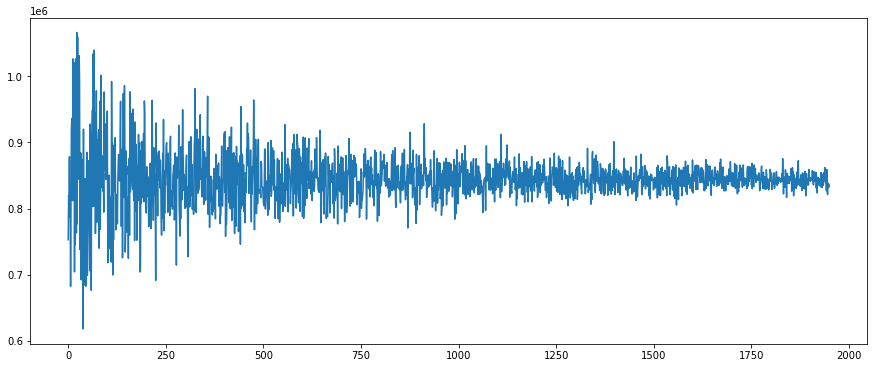

In [102]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 2000 is taken 1000 times

In [103]:
means = []
for sample_size in range(1000):
    sample_mean = df_married['Total_Purchase'].sample(2000).mean()
    means.append(sample_mean)

[]

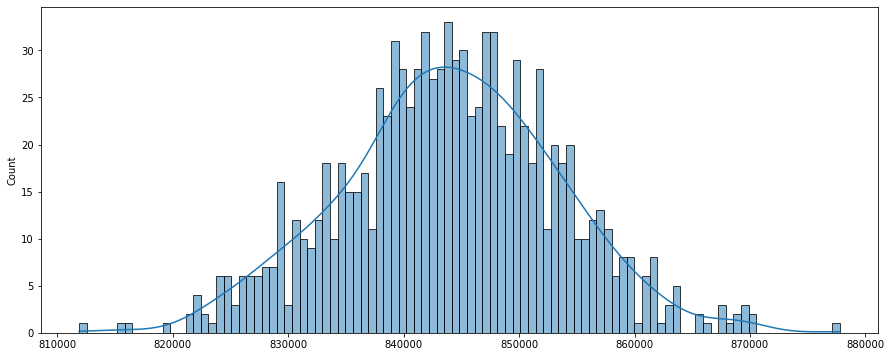

In [104]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by marrieds with 90% Confidence

In [105]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(844027.7222445, 9372.038527990922)

In [106]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(828612.0906798051, 859443.3538091948)

#### Determining Mean Total Purchase made by marrieds with 95% Confidence

In [107]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(825658.864267916, 862396.580221084)

##### Determining Mean Total Purchase made by marrieds with 99% Confidence

In [108]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(819886.9507701116, 868168.4937188883)

## Determining the mean purchase made by each user per transaction based on their age groups :

In [109]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [110]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']

In [111]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

### For Age Group 0 - 17 years

In [112]:
df_age_0_to_17

,User_ID,Total_Purchase
0,1000001,334093
1,1000019,1458069
2,1000051,200772
3,1000075,1035584
4,1000086,294063
...,...,...
213,1005844,476231
214,1005953,629161
215,1005973,270475
216,1005989,466195


##### How the deviations vary for different sample sizes ? 

In [113]:
mean_purchases = []
for sample_size in range(50, 200):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

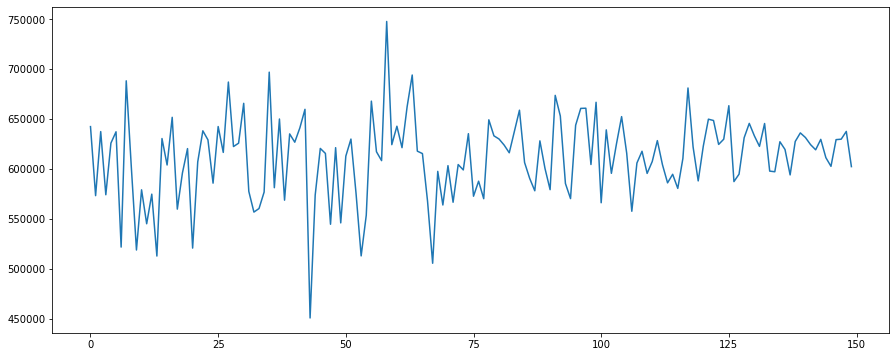

In [114]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.xticks(np.arange(0, 201, 25))
plt.plot()

##### For conservative analysis, sample size of 200 is taken 1000 times

In [115]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(200).mean()
    means.append(sample_mean)

[]

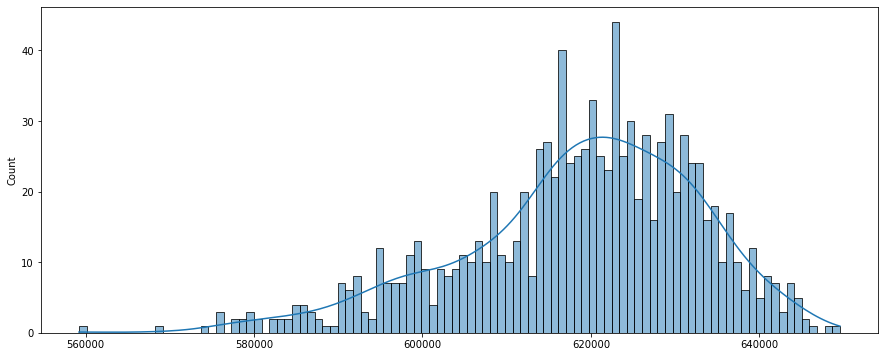

In [116]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by Age Group 0 - 17 with 90% Confidence

In [117]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(618686.7136200002, 14143.949533265046)

In [118]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(595421.9869307906, 641951.4403092097)

##### Determining Mean Total Purchase made by Age Group 0 - 17 with 95% Confidence

In [119]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(590965.0819356486, 646408.3453043518)

##### Determining Mean Total Purchase made by Age Group 0 - 17 with 99% Confidence

In [120]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(582254.3139442992, 655119.1132957011)

### For Age Group 18 - 25 years

In [121]:
df_age_18_to_25

,User_ID,Total_Purchase
0,1000018,1979047
1,1000021,127099
2,1000022,1279914
3,1000025,534706
4,1000034,807983
...,...,...
1064,1005998,702901
1065,1006008,266306
1066,1006027,265201
1067,1006028,362972


##### How the deviations vary for different sample sizes ? 

In [122]:
mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

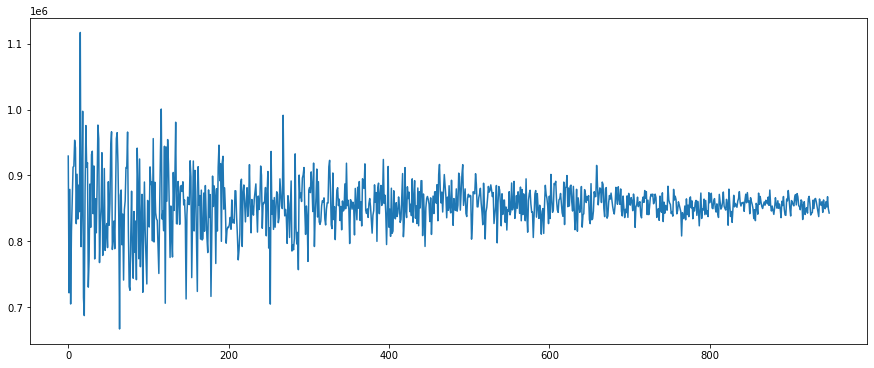

In [123]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 800 is taken 1000 times

In [124]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(800).mean()
    means.append(sample_mean)

[]

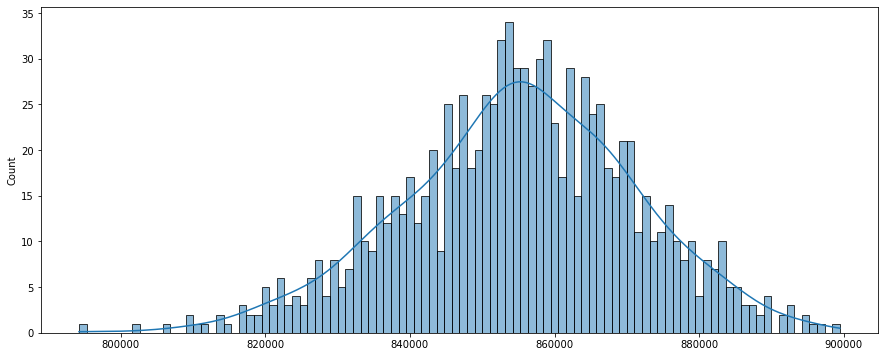

In [125]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by Age Group 18 - 25 with 90% Confidence

In [126]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(855050.1112987499, 16070.150161145259)

In [127]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(828617.0665205354, 881483.1560769645)

##### Determining Mean Total Purchase made by Age Group 18 - 25 with 95% Confidence

In [128]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(823553.1957567546, 886547.0268407451)

##### Determining Mean Total Purchase made by Age Group 18 - 25 with 99% Confidence

In [129]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(813656.1476012409, 896444.074996259)

### For Age Group 26 - 35 years

In [130]:
df_age_26_to_35

,User_ID,Total_Purchase
0,1000003,341635
1,1000005,821001
2,1000008,796593
3,1000009,594099
4,1000011,557023
...,...,...
2048,1006030,737361
2049,1006034,197086
2050,1006035,956645
2051,1006036,4116058


##### How the deviations vary for different sample sizes ? 

In [131]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

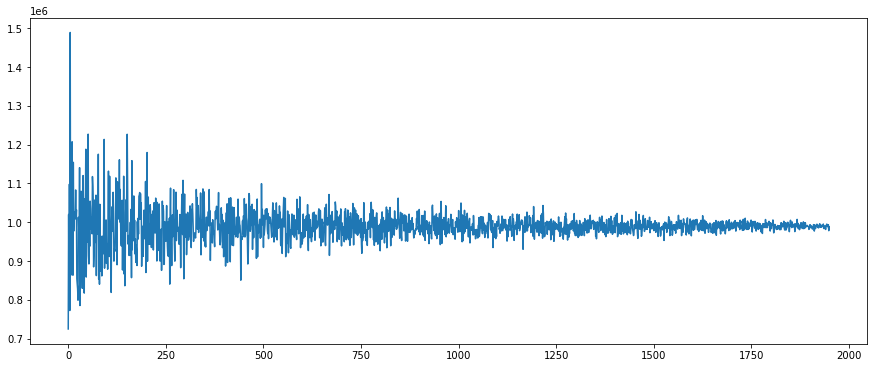

In [132]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 1500 is taken 1000 times

In [133]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(1500).mean()
    means.append(sample_mean)

[]

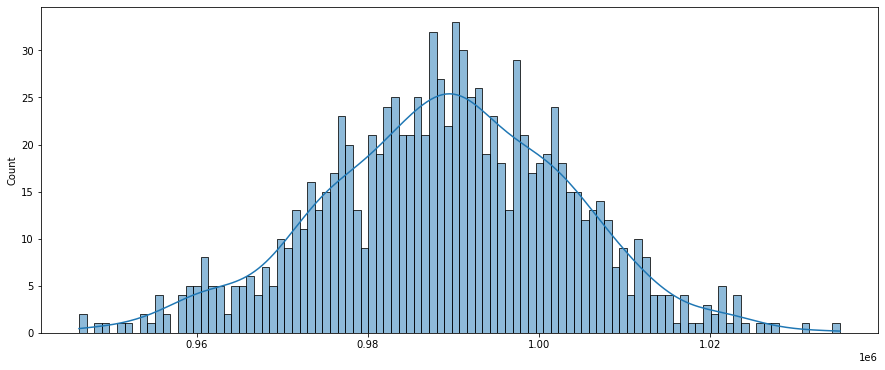

In [134]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by Age Group 26 - 35 with 90% Confidence

In [135]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(989118.4490506666, 14268.145662259449)

In [136]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(965649.4379082273, 1012587.460193106)

##### Determining Mean Total Purchase made by Age Group 26 - 35 with 95% Confidence

In [137]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(961153.3974264667, 1017083.5006748666)

##### Determining Mean Total Purchase made by Age Group 26 - 35 with 99% Confidence

In [138]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(952366.1413465146, 1025870.7567548187)

### For Age Group 36 - 45 years

In [139]:
df_age_36_to_45

,User_ID,Total_Purchase
0,1000007,234668
1,1000010,2169510
2,1000014,127629
3,1000016,150490
4,1000023,1670998
...,...,...
1162,1006011,1198714
1163,1006012,127920
1164,1006017,160230
1165,1006018,975585


##### How the deviations vary for different sample sizes ? 

In [140]:
mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

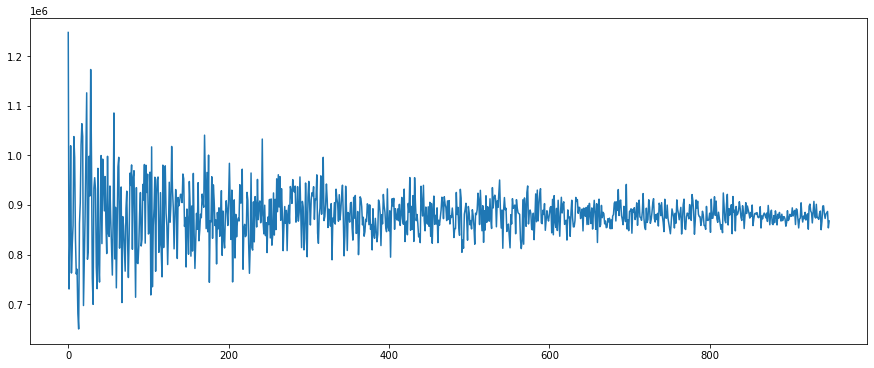

In [141]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 800 is taken 1000 times

In [142]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(800).mean()
    means.append(sample_mean)

[]

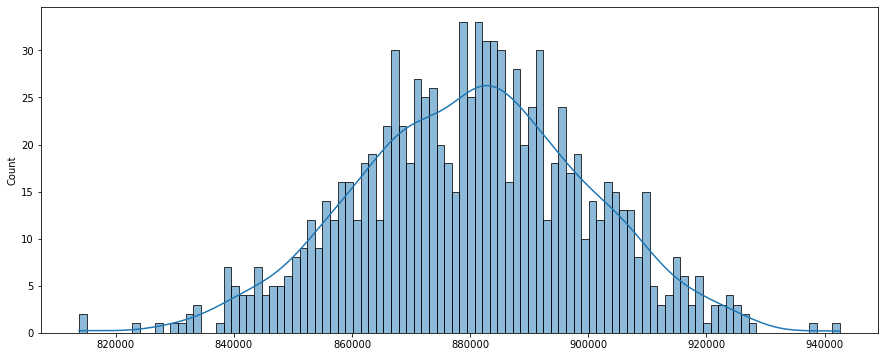

In [143]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by Age Group 36 - 45 with 90% Confidence

In [144]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(880214.76703, 19453.655739224567)

In [145]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(848216.3508298711, 912213.1832301288)

##### Determining Mean Total Purchase made by Age Group 36 - 45 with 95% Confidence

In [146]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(842086.302413479, 918343.231646521)

##### Determining Mean Total Purchase made by Age Group 36 - 45 with 99% Confidence

In [147]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(830105.4705157531, 930324.0635442468)

### For Age Group 46 - 50 years

In [148]:
df_age_46_to_50

,User_ID,Total_Purchase
0,1000004,206468
1,1000013,713927
2,1000033,1940418
3,1000035,821303
4,1000044,1180380
...,...,...
526,1006014,528238
527,1006016,3770970
528,1006032,517261
529,1006037,1119538


##### How the deviations vary for different sample sizes ? 

In [149]:
mean_purchases = []
for sample_size in range(50, 500):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

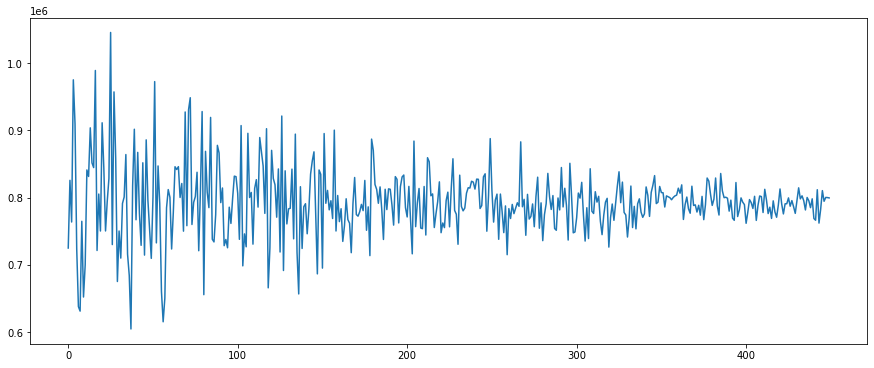

In [150]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, sample size of 400 is taken 1000 times

In [151]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(400).mean()
    means.append(sample_mean)

[]

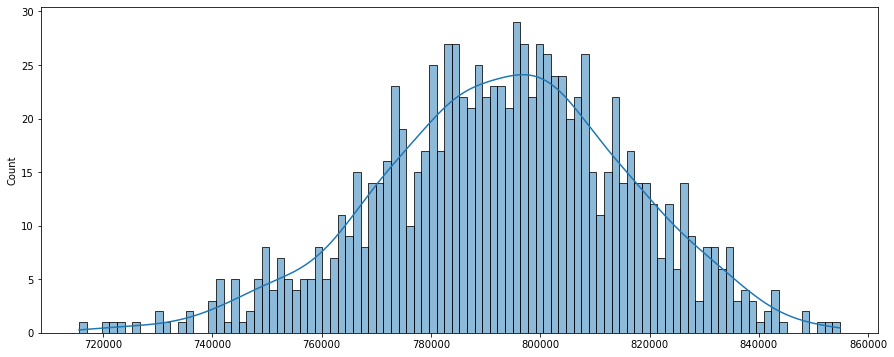

In [152]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

##### Determining Mean Total Purchase made by Age Group 46 - 50 with 90% Confidence

In [153]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(793073.4927874999, 22766.85724313539)

In [154]:
sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std

(755625.3450768422, 830521.6404981576)

##### Determining Mean Total Purchase made by Age Group 46 - 50 with 95% Confidence

In [155]:
sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std

(748451.2725497896, 837695.7130252102)

##### Determining Mean Total Purchase made by Age Group 46 - 50 with 99% Confidence

In [156]:
sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std

(734429.9547509173, 851717.0308240826)

## Actionable insights

 - Out of every four transactions made on Black Friday in the Walmart stores, three are made by the males and one is made by the females.
 - 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order
of the total transactions' share.)
 - Majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.
 - 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.
 - There are 1666 unique female customers and 4225 unique male customers. Average number of transactions made by each Male on Black Friday is 98 while for Female it is 82.
 - On an average each male makes a total purchase of 712024.394958 on Black Friday while for each female the figure is 925344.402367.
 - 76.72 % of the total revenue is generated from males.
 - Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
 - Average number of transactions made by each user with marital status Married is 91 and for Single it is 95.
 - On an average each Married customer makes a total purchase of 843526.796686 on Black Friday while for each Single customer the figure is 880575.781972.
 - 59.05 % of the total revenue is generated from the customers who are Single.
 - Majority of the transactions are made by the customers whose age is between 26 and 45 years.
 - About 81.82% of the total transactions are made by customers of age between 18 and 50 years.
 - 81.82 % of total unique customers have age between 18 and 50 years.
 - Out of all unique customers, 35.85 % belong to the age group of 26 - 35 years, 19.81 % belong to the age group of 36 - 45 years, 18.15 % belong to the age group of 18 - 25 years, 9.01 % belong to the age group of 46 - 50 years.
 - Walmart generated 86.21 % of total revenue from customers in range 18 to 50 years on Black Friday.
 - 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years, 20.15 % is generated from 36 - 45 years, 17.93 % from 18 - 25 years, 8.26 % from 46 - 50 years.
 - Majority of the total unique customers belong to the city C. 82.26 % of the total unique customers belong to city C and B.
 - Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city A on Black Friday.
 - Top 5 product categories from which Walmart made 84.36 % of total revenue on Black Friday are 1, 5, 8, 6 and 2.
 - Mean Total Purchase made by males lies in the 90% Confidence Interval of (919449.38, 931427.31), 95% Confidence Interval of (918302.05, 932574.64), 99% Confidence Interval of (901570.35, 949355.85) for sample size of 4000 taken 1000 times.
 - Mean Total Purchase made by females lies in the 90% Confidence Interval of (701674.04, 722233.84), 95% Confidence Interval of (699704.69, 724203.20), 99% Confidence Interval of (695855.69, 728052.19) for sample size of 1500 taken 1000 times.
 - Mean Total Purchase made by singles lies in the 90% Confidence Interval of (870556.09, 890708.94), 95% Confidence Interval of (868625.72, 892639.32), 99% Confidence Interval of (864852.91, 896412.13) for sample size of 3000 taken 1000 times.
 - Mean Total Purchase made by marrieds lies in the 90% Confidence Interval of (858757.213, 903452.27), 95% Confidence Interval of (854476.02, 907733.47), 99% Confidence Interval of (846108.67, 916100.82) for sample size of 2000 taken 1000 times.

## Recommendations

 - Since the average total purchase made by males is greater than females, Walmart should give special attention to their choices of products so as to retain them.
 - Since 82.33 % of the total transactions are made by the customers belonging to the occupations 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, Walmart should keep on adding new quality products related to their field of work.
 - Since 82.43% of the total transactions are made for the Product Categories 5, 1, 8, 11 and 2, Walmart can earn more profits if they add new products in these product categories.
 - Since 76.72 % of the total revenue is generated from males, Walmart should give special discounts to males on occasions like International Men's Day (19th Nov).
 - Since 59.05 % of the total revenue is generated from the customers who are Single, special discounts should be given on the occasions like Single's Day. Moreover, Walmart should focus on acquisition of Unmarried customers.
 - Since Walmart generated 41.52 % of the total revenue from the customers belonging to the city B and 32.65 % from city C, customers belonging to such cities should be given special priority.
 - As 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years and 20.15 % is generated from 36 - 45 years, Walmart should focus on acquisition of customers whose age is in between 26 and 45 years.
